In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import yaml
import json

from ms_pred import common
from ms_pred.common import plot_utils
from ms_pred.common.plot_utils import *

set_style()


%load_ext autoreload
%autoreload 2

/home/samlg/.conda/envs/ms-gen/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
dataset_names = ["nist20", "canopus_train_public"]
#results_folder = Path("../results/figs/")
results_folder = Path("../results/figs_scarf/retrieval")
results_folder.mkdir(parents=True, exist_ok=True)


In [18]:
names = [
        "Random",
        "3DMolMS",
        "FixedVocab",
        "NEIMS (FFN)",
        "NEIMS (GNN)",
        "SCARF", 
    ]
dataset_to_res = {}
for dataset_name in dataset_names:
    results_files = [
        f"../results/dag_inten_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_random.yaml",
        f"../results/molnetms_baseline_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml",
        f"../results/graff_ms_baseline_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml",
        f"../results/ffn_baseline_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml",
        f"../results/gnn_baseline_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml",
        f"../results/scarf_inten_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml",
        f"../results/dag_inten_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml"
    ]

    yaml_files = {i: yaml.safe_load(open(j, "r")) for i, j in zip(names, results_files)}
    dataset_to_res[dataset_name] = yaml_files

In [19]:
f1 = list(yaml_files.values())[0]
f1.keys()

dict_keys(['avg_top_1', 'avg_top_10', 'avg_top_2', 'avg_top_3', 'avg_top_4', 'avg_top_5', 'avg_top_6', 'avg_top_7', 'avg_top_8', 'avg_top_9', 'avg_total_decoys', 'avg_true_dist', 'data_folder', 'dataset', 'dist_fn', 'individuals'])

In [20]:
out_df = []
keys_to_name = {f"avg_top_{i}": i for i in range(1,11)}

for dataset, yaml_files in dataset_to_res.items():
    for k, v in yaml_files.items():
        for old_name, new_name in keys_to_name.items():
            new_entry = {
                "Method": k, 
                "Top k": new_name,
                "Acc": v[old_name],
                "Dataset": dataset
            }
            out_df.append(new_entry)
out_df = pd.DataFrame(out_df)


In [21]:

for dataset_name in dataset_names:
    # Filter out df to specific dataset 
    df = out_df[out_df["Dataset"] == dataset_name]
    pivoted_tbl = df.reset_index().pivot_table(index="Method", values="Acc", columns="Top k")
    pivoted_tbl.index.name = None
    pivoted_tbl = pivoted_tbl.round(3)
    pivoted_tbl = pivoted_tbl.loc[names]

    display(pivoted_tbl)
    latex = pivoted_tbl.to_latex(caption=f"{dataset_name} spectra prediction retrieval accuracy", 
                                label=f"tab:{dataset_name}_spec_retrieval")
    print(latex)

Top k,1,2,3,4,5,6,7,8,9,10
Random,0.025,0.047,0.073,0.097,0.118,0.139,0.162,0.186,0.209,0.234
3DMolMS,0.051,0.101,0.148,0.192,0.228,0.271,0.307,0.336,0.370,0.402
FixedVocab,0.165,0.299,0.403,0.470,0.521,0.566,0.608,0.635,0.664,0.690
NEIMS (FFN),0.106,0.233,0.318,0.378,0.424,0.465,0.501,0.532,0.564,0.592
NEIMS (GNN),0.169,0.296,0.391,0.462,0.515,0.555,0.584,0.620,0.650,0.678
SCARF,0.184,0.323,0.415,0.492,0.546,0.588,0.624,0.653,0.677,0.703


\begin{table}
\centering
\caption{nist20 spectra prediction retrieval accuracy}
\label{tab:nist20_spec_retrieval}
\begin{tabular}{lrrrrrrrrrr}
\toprule
Top k &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\
\midrule
Random      &  0.025 &  0.047 &  0.073 &  0.097 &  0.118 &  0.139 &  0.162 &  0.186 &  0.209 &  0.234 \\
3DMolMS     &  0.051 &  0.101 &  0.148 &  0.192 &  0.228 &  0.271 &  0.307 &  0.336 &  0.370 &  0.402 \\
FixedVocab  &  0.165 &  0.299 &  0.403 &  0.470 &  0.521 &  0.566 &  0.608 &  0.635 &  0.664 &  0.690 \\
NEIMS (FFN) &  0.106 &  0.233 &  0.318 &  0.378 &  0.424 &  0.465 &  0.501 &  0.532 &  0.564 &  0.592 \\
NEIMS (GNN) &  0.169 &  0.296 &  0.391 &  0.462 &  0.515 &  0.555 &  0.584 &  0.620 &  0.650 &  0.678 \\
SCARF       &  0.184 &  0.323 &  0.415 &  0.492 &  0.546 &  0.588 &  0.624 &  0.653 &  0.677 &  0.703 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_1293952/559837583.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = pivoted_tbl.to_latex(caption=f"{dataset_name} spectra prediction retrieval accuracy",


Top k,1,2,3,4,5,6,7,8,9,10
Random,0.021,0.053,0.087,0.114,0.137,0.151,0.180,0.205,0.225,0.241
3DMolMS,0.082,0.158,0.216,0.254,0.298,0.339,0.380,0.423,0.461,0.492
FixedVocab,0.198,0.329,0.406,0.457,0.505,0.555,0.587,0.612,0.630,0.653
NEIMS (FFN),0.212,0.330,0.412,0.469,0.510,0.543,0.569,0.590,0.613,0.636
NEIMS (GNN),0.187,0.302,0.370,0.427,0.470,0.514,0.550,0.586,0.613,0.635
SCARF,0.112,0.233,0.320,0.369,0.425,0.470,0.515,0.552,0.582,0.613


\begin{table}
\centering
\caption{canopus_train_public spectra prediction retrieval accuracy}
\label{tab:canopus_train_public_spec_retrieval}
\begin{tabular}{lrrrrrrrrrr}
\toprule
Top k &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\
\midrule
Random      &  0.021 &  0.053 &  0.087 &  0.114 &  0.137 &  0.151 &  0.180 &  0.205 &  0.225 &  0.241 \\
3DMolMS     &  0.082 &  0.158 &  0.216 &  0.254 &  0.298 &  0.339 &  0.380 &  0.423 &  0.461 &  0.492 \\
FixedVocab  &  0.198 &  0.329 &  0.406 &  0.457 &  0.505 &  0.555 &  0.587 &  0.612 &  0.630 &  0.653 \\
NEIMS (FFN) &  0.212 &  0.330 &  0.412 &  0.469 &  0.510 &  0.543 &  0.569 &  0.590 &  0.613 &  0.636 \\
NEIMS (GNN) &  0.187 &  0.302 &  0.370 &  0.427 &  0.470 &  0.514 &  0.550 &  0.586 &  0.613 &  0.635 \\
SCARF       &  0.112 &  0.233 &  0.320 &  0.369 &  0.425 &  0.470 &  0.515 &  0.552 &  0.582 &  0.613 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_1293952/559837583.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = pivoted_tbl.to_latex(caption=f"{dataset_name} spectra prediction retrieval accuracy",


```

\begin{table}
\centering
\caption{nist20 spectra prediction retrieval accuracy}
\label{tab:nist20_spec_retrieval}
\begin{tabular}{lrrrrrrrrrr}
\toprule
Top k &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\
\midrule
NEIMS (FFN) &  0.106 &  0.233 &  0.318 &  0.378 &  0.424 &  0.465 &  0.501 &  0.532 &  0.564 &  0.592 \\
NEIMS (GNN) &  0.169 &  0.296 &  0.391 &  0.462 &  0.515 &  0.555 &  0.584 &  0.620 &  0.650 &  0.678 \\
SCARF       &  0.184 &  0.323 &  0.415 &  0.492 &  0.546 &  0.588 &  0.624 &  0.653 &  0.677 &  0.703 \\
\bottomrule
\end{tabular}
\end{table}
```


```
\begin{table}
\centering
\caption{canopus_train_public spectra prediction retrieval accuracy}
\label{tab:canopus_train_public_spec_retrieval}
\begin{tabular}{lrrrrrrrrrr}
\toprule
Top k &     1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\
\midrule
NEIMS (FFN) &  0.212 &  0.330 &  0.412 &  0.469 &  0.510 &  0.543 &  0.569 &  0.590 &  0.613 &  0.636 \\
NEIMS (GNN) &  0.187 &  0.302 &  0.370 &  0.427 &  0.470 &  0.514 &  0.550 &  0.586 &  0.613 &  0.635 \\
SCARF       &  0.112 &  0.233 &  0.320 &  0.369 &  0.425 &  0.470 &  0.515 &  0.552 &  0.582 &  0.613 \\
\bottomrule
\end{tabular}
\end{table}
```

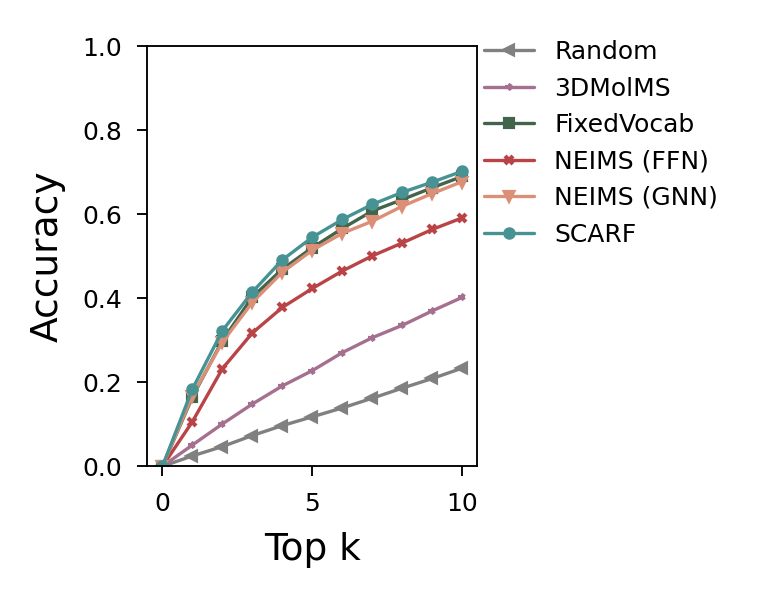

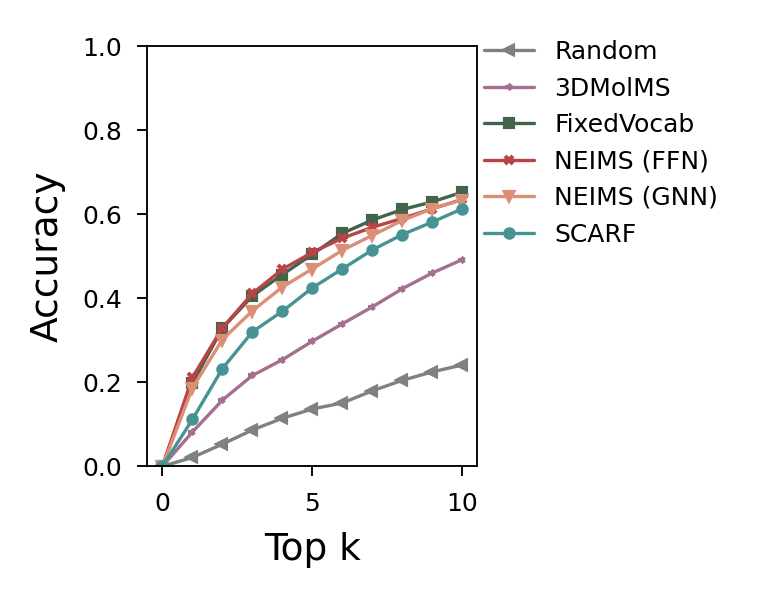

In [33]:
out_df_full = out_df.copy()
method_names = names
for dataset_name in dataset_names:
    sub_df = out_df[out_df["Dataset"] == dataset_name]
    #method_linestyle = dict(zip(method_names, ["o", "v", "x"]))
    figsize= (1.1,1.4)
    fig = plt.figure(figsize=figsize, dpi=300)
    ax = fig.gca()
    for method in method_names:
        sub_df_method = sub_df[sub_df['Method'] == method]
        topk = [0] + sub_df_method['Top k'].values.tolist()
        accs = [0] + sub_df_method['Acc'].values.tolist()
        # ax.step(topk, accs, color=method_colors[method],
        #         linewidth=0.8, where="pre"
        # )
        marker = method_markers[method]
        # print(marker)
        ax.plot(topk, accs, color=method_colors[method],
                linewidth=0.8, label=method, marker=marker,
                markersize=2
        )

    ax.set_xlabel("Top k")
    ax.set_ylabel("Accuracy")
    # ax.set_xlim([-0.1,5.2])
    ax.set_ylim([0, 1.0])
    ax.legend(frameon=False, facecolor="none", fancybox=False,loc=(0.99, 0.5))
    set_size(*figsize, ax)
    fig.savefig(results_folder / f"step_plot_{dataset_name}.pdf", dpi=400, bbox_inches="tight", transparent=True)


## Plot example spectra

In [9]:
out_df = out_df.set_index("Method").round(3)
out_df.index.name = None


In [20]:
## Examples 

In [88]:
scarf_inds = yaml_files['SCARF']['individuals']
gnn_inds = yaml_files['NEIMS (GNN)']['individuals']
scarf_spec_to_ind = {i['spec_name']: i['ind_recovered'] for i in scarf_inds}
gnn_spec_to_ind = {i['spec_name']: i['ind_recovered'] for i in gnn_inds}


In [22]:
scarf_better = [k for k, v in scarf_spec_to_ind.items() if v == 1 and v < gnn_spec_to_ind[k]]

In [23]:
np.random.seed(2)
len(scarf_better)
ex_specs = np.random.choice(scarf_better, 5)
print(ex_specs)

['nist_1788697' 'nist_1190511' 'nist_1384033' 'nist_1208536'
 'nist_3195026']


['nist_1788697' 'nist_1190511' 'nist_1384033' 'nist_1208536'
 'nist_3195026']


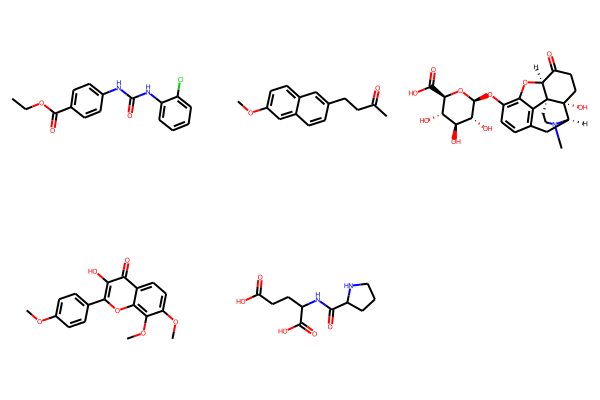

In [24]:
print(ex_specs)
mols = [Chem.MolFromSmiles(name_to_smi[i]) for i in ex_specs]
Draw.MolsToGridImage(mols,)# figsize=(20,10))

In [25]:
def export_ex_specs(ex_specs, folder_name = "output_examples", add_numbers=True, figsize = (2.1, 1.4)):
    spec_folder = results_folder / folder_name
    spec_folder.mkdir(exist_ok=True)

    for ex_spec in ex_specs:
        spec_file = data_folder / f"subformulae/no_subform/{ex_spec}.json"
        true_spec = json.load(open(spec_file, "r"))

        export_spec_folder = Path("../results/scarf_inten_nist20/split_1/preds_export_nist20/tree_preds_inten")
        pred_spec_file = export_spec_folder / f"pred_{ex_spec}.json"
        pred_spec =  json.load(open(pred_spec_file, "r"))

        # Make predictions
        mz, inten = pred_spec['output_tbl']['formula_mass_no_adduct'], pred_spec['output_tbl']['rel_inten']
        pred_forms = pred_spec['output_tbl']['formula']
        top_forms = np.argsort(inten)[::-1][:5]
        out_map = "\n".join(["\t".join([str(j) for j in i]) for i in list(enumerate(pred_forms))])
        out_info =  f"Smiles: {pred_spec['smiles']}, Formula: {pred_spec['cand_form']}\n{out_map}"
        fig = plt.figure(figsize=(figsize), dpi=300)
        ax = fig.gca()
        inten = inten / np.max(inten)
        for ind, (m, i, pred_form) in enumerate(zip(mz, inten, pred_forms)):
            label_kwargs = {"label":"SCARF"} if ind == 0 else {}
            ax.vlines(x=m, ymin=0,ymax=i, color=method_colors.get("SCARF"), linewidth=0.5, **label_kwargs)
            # Make form label
            if ind in top_forms and add_numbers:
                ax.text(x=m, y=i + 0.2, s = f"{ind}", fontsize=6, rotation=90) 


        mz, inten = true_spec['output_tbl']['formula_mass_no_adduct'], true_spec['output_tbl']['rel_inten']
        for ind, (m, i) in enumerate(zip(mz, inten)):
            label_kwargs = {"label":"True"} if ind == 0 else {}
            ax.vlines(x=m, ymin=0,ymax=-i, color="black", linewidth=0.5, **label_kwargs,
            )
        ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=0.1)
        ax.set_xlabel("M/Z")
        ax.set_ylabel("Intensity")
        ax.set_title(f"Spectra: {ex_spec}")
        ax.set_ylim([-1.5, 1.5])
        ax.set_yticklabels([abs(i) for i in ax.get_yticks()])
        ax.legend(**legend_params, loc="upper left")
        set_size(*figsize, ax)
        fig.savefig(spec_folder / f"{ex_spec}.pdf", dpi=300, bbox_inches="tight", transparent=True)
        with open(spec_folder / f"{ex_spec}.txt", "w") as fp:
            fp.write(out_info)
        mol_obj = Chem.MolFromSmiles(pred_spec['smiles'])
        plot_utils.export_mol(mol_obj, spec_folder / f"{ex_spec}_mol.pdf", width=100, height=100)


/tmp/ipykernel_2422538/3051447078.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(i) for i in ax.get_yticks()])
/tmp/ipykernel_2422538/3051447078.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(i) for i in ax.get_yticks()])


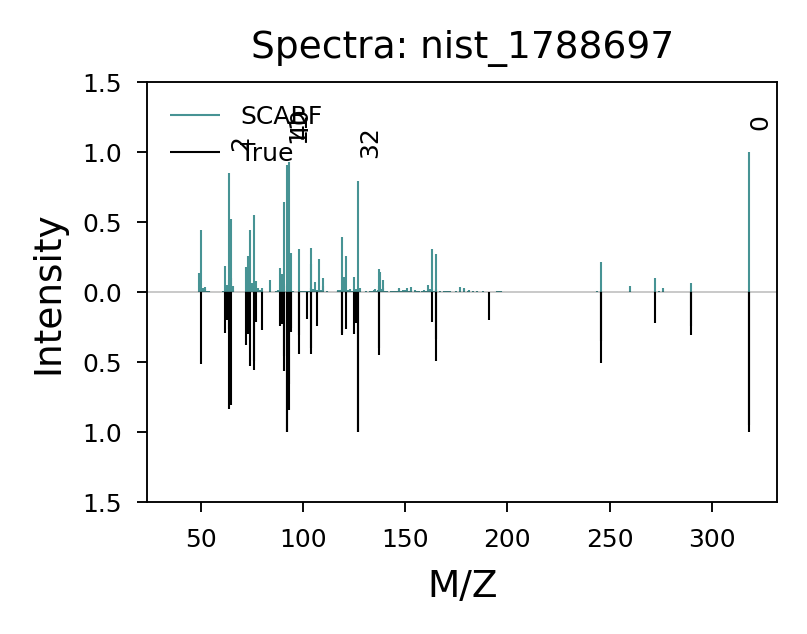

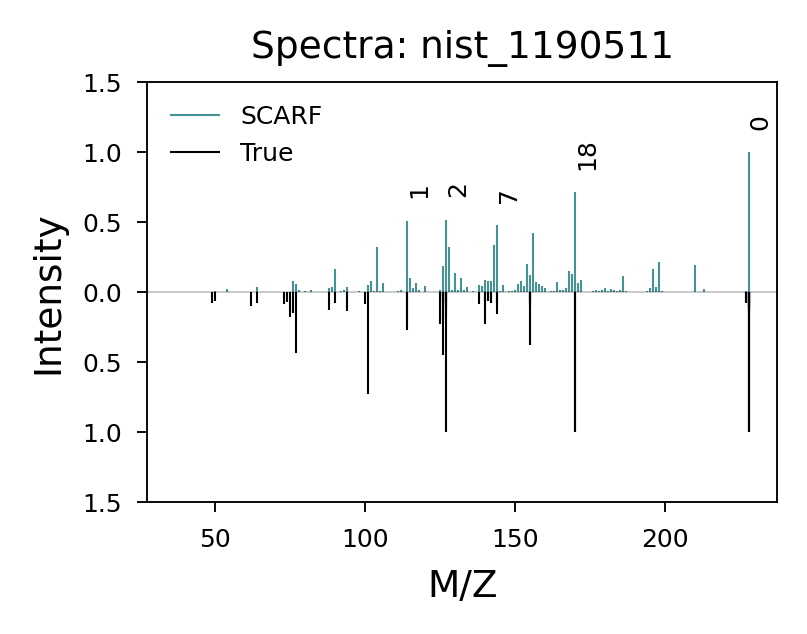

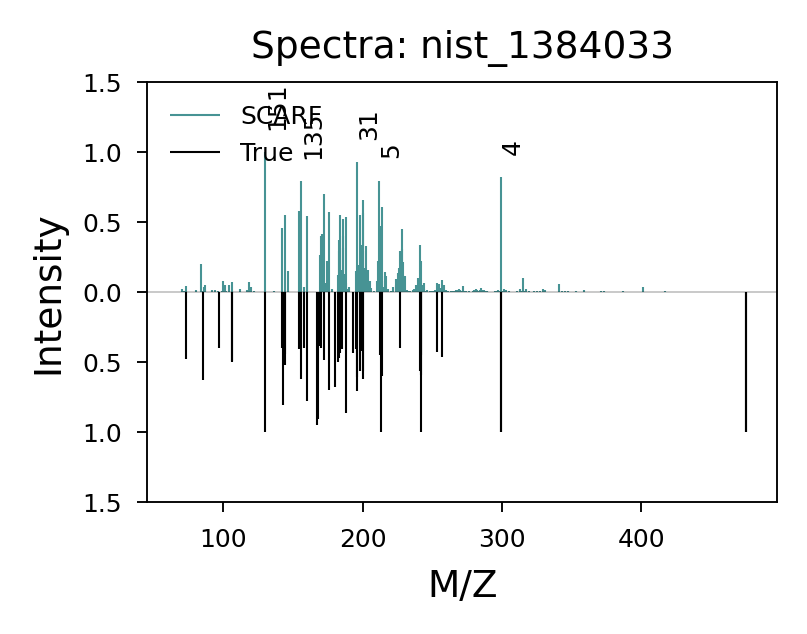

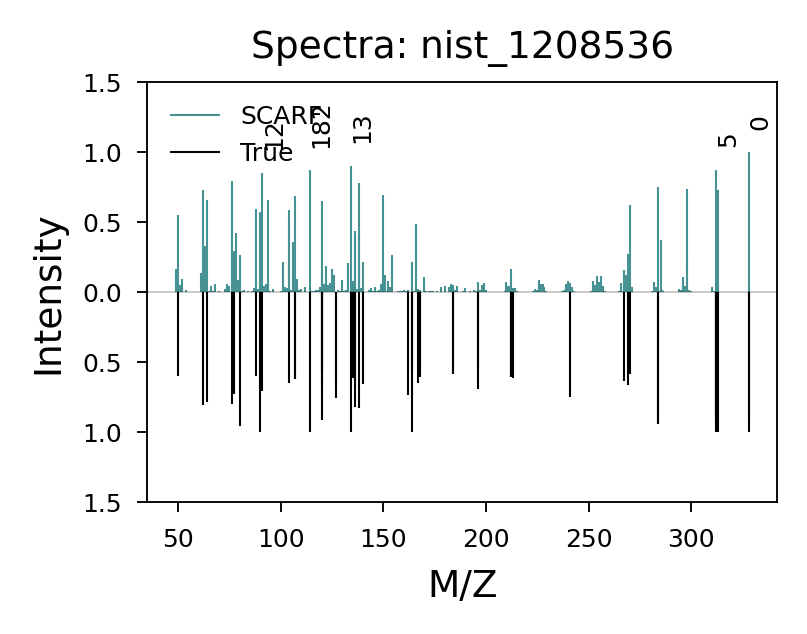

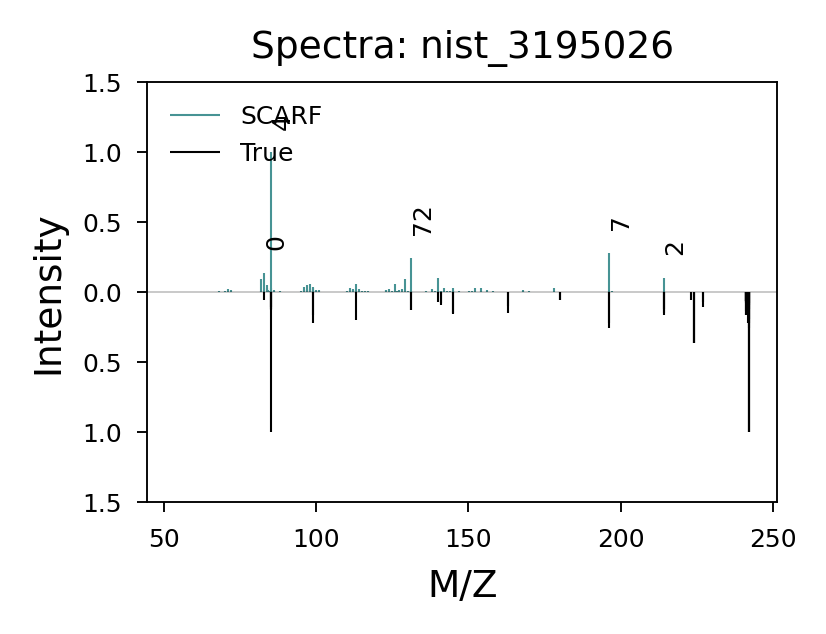

In [26]:
export_ex_specs(ex_specs=ex_specs)

/tmp/ipykernel_2422538/3051447078.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(i) for i in ax.get_yticks()])


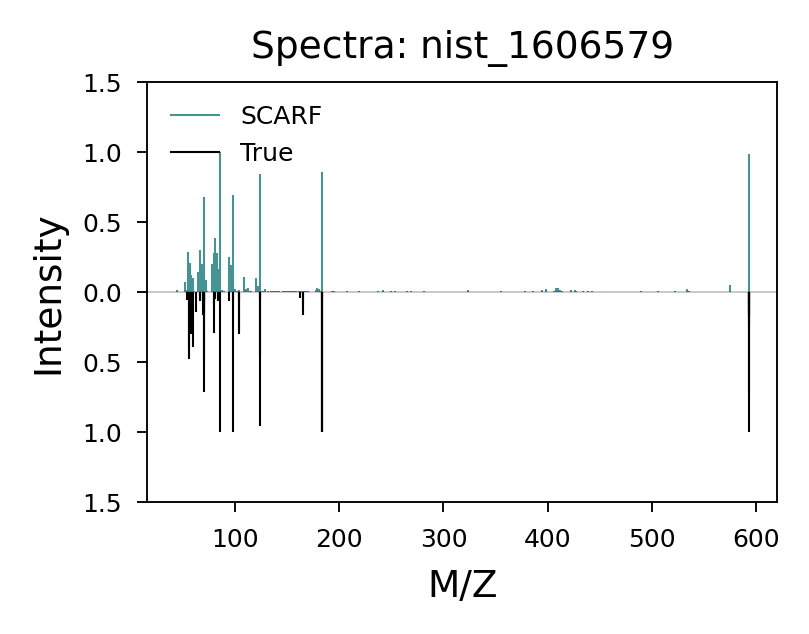

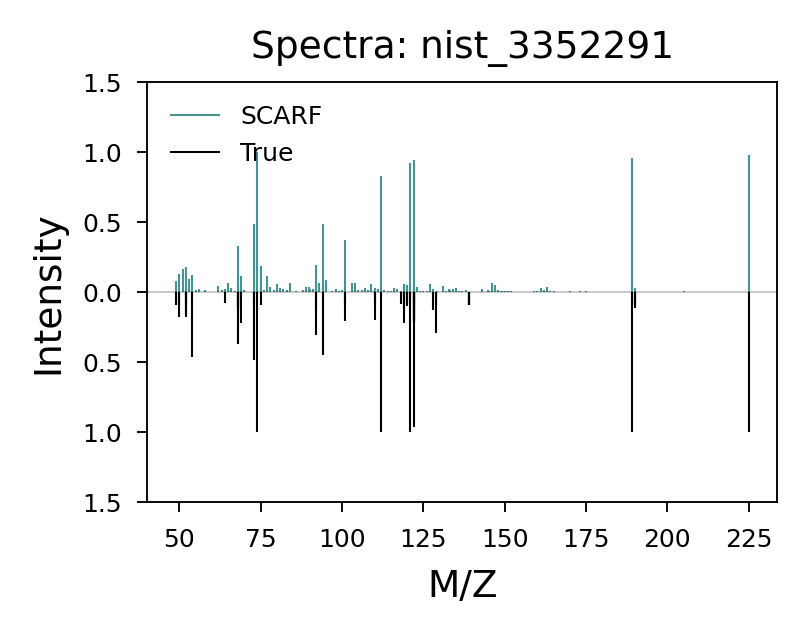

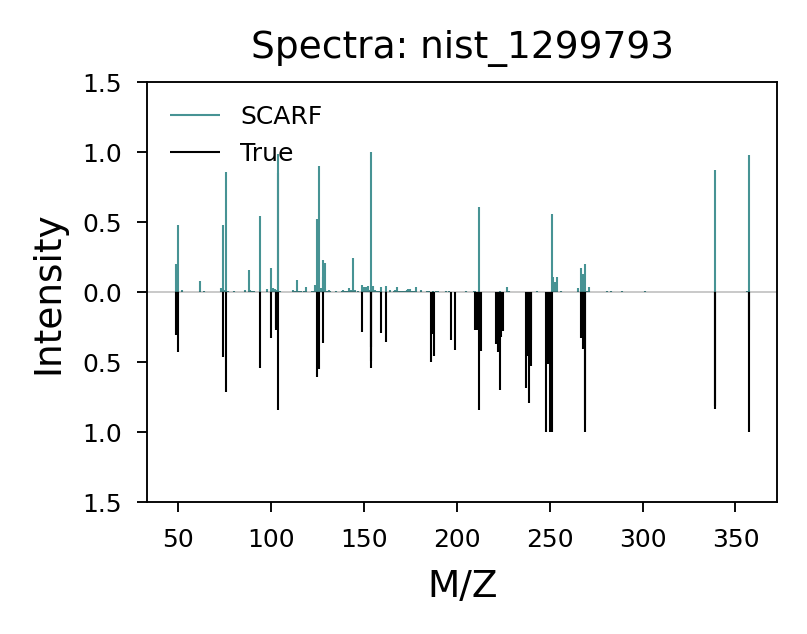

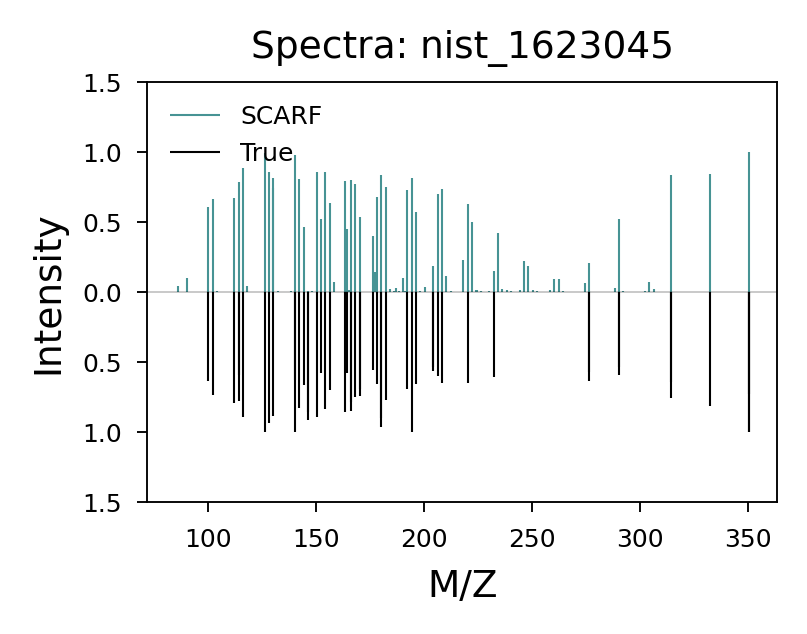

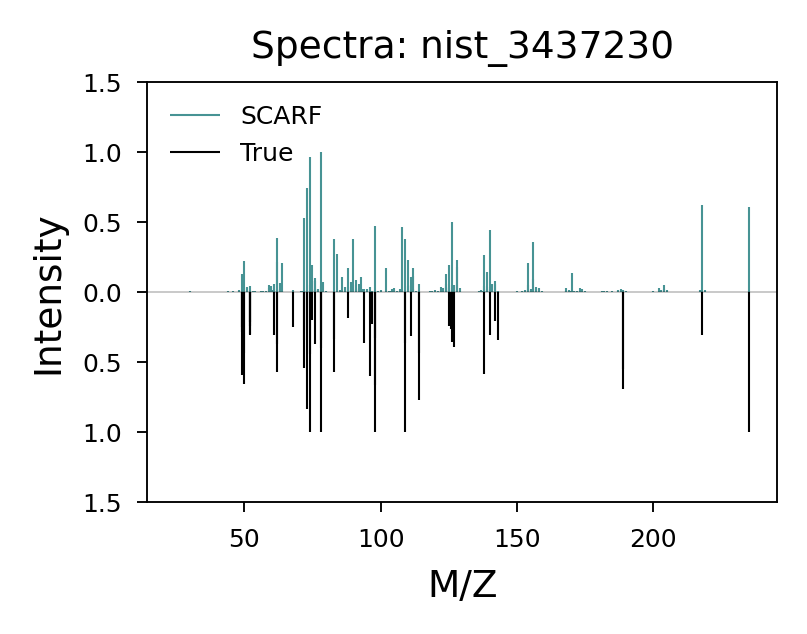

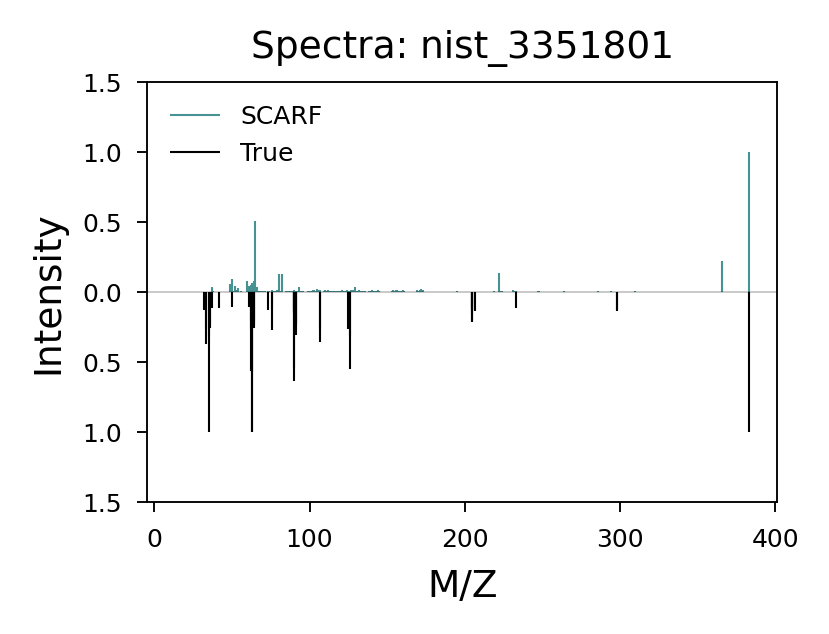

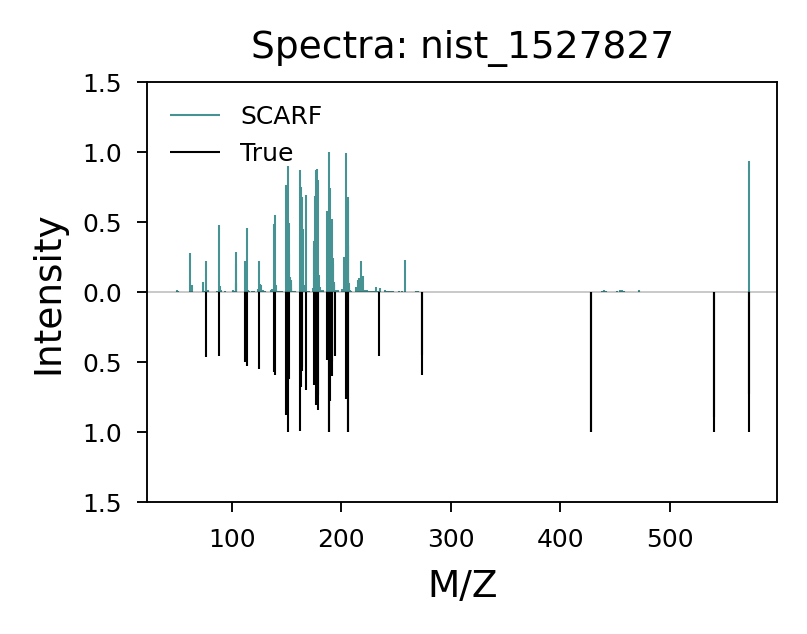

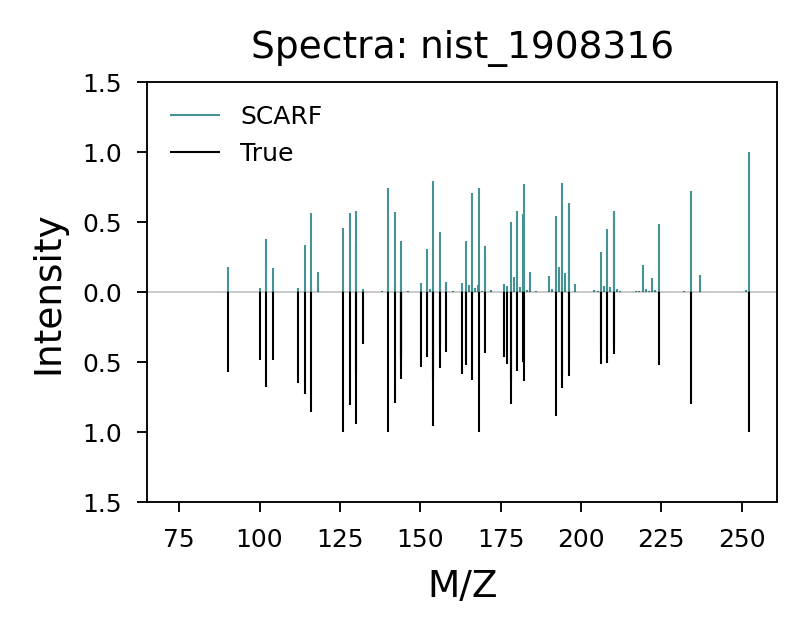

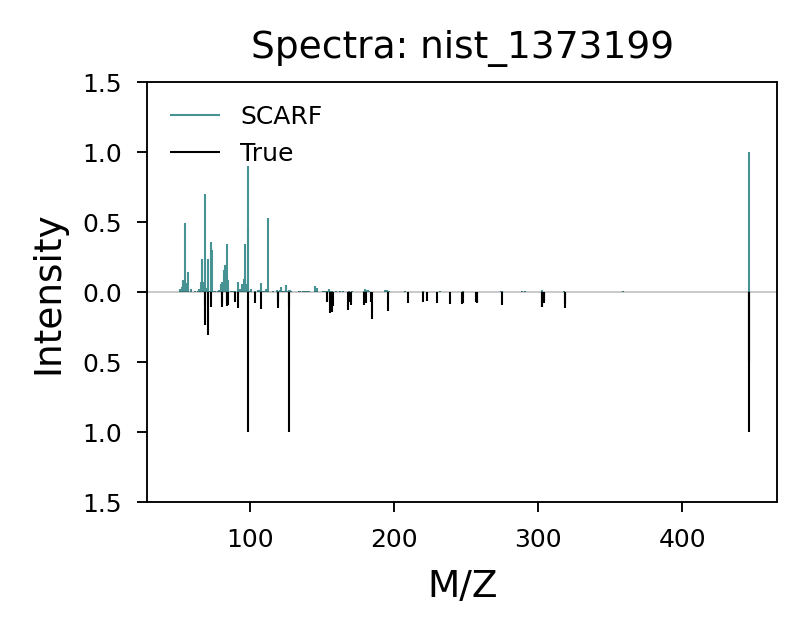

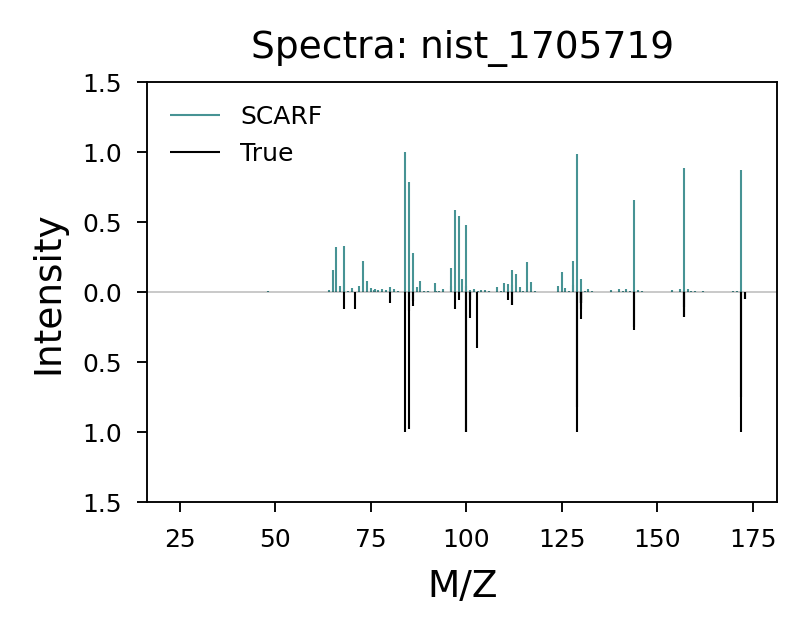

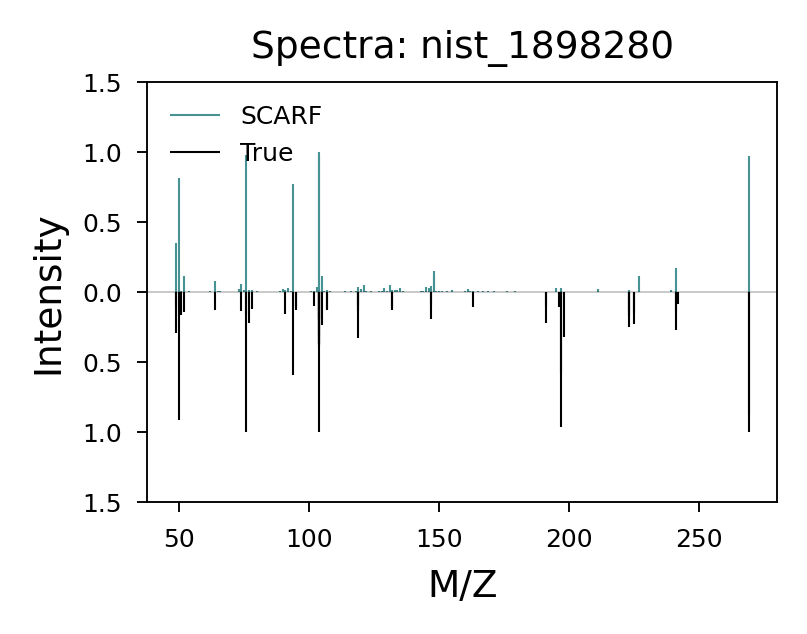

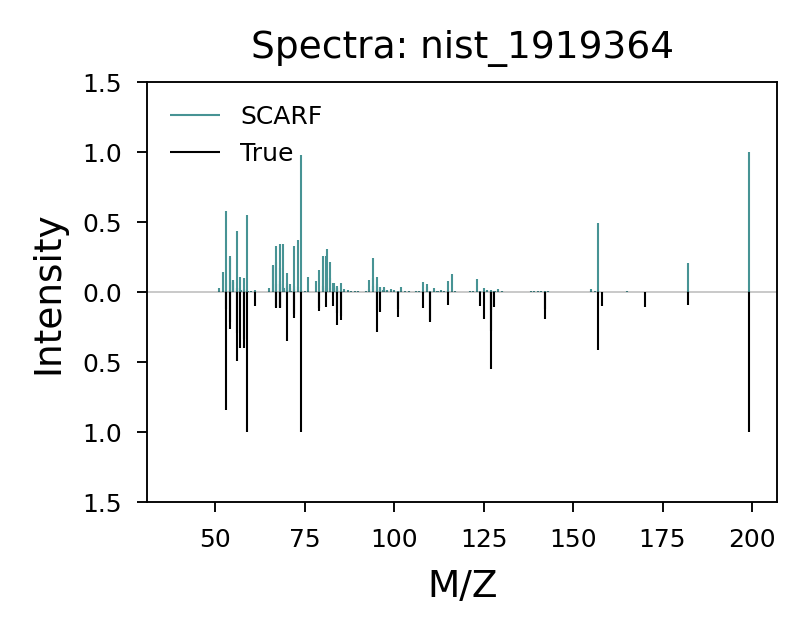

In [27]:
sorted_keys = sorted(list(scarf_spec_to_ind.keys()))
np.random.seed(10)
ex_specs = np.random.choice(sorted_keys, 12)
export_ex_specs(ex_specs=ex_specs, folder_name = "si_specs", add_numbers=False)

## Retrieval analysis

In [130]:
dataset_name = "nist20" # "canopus_train_public"
gnn_ret_file = f"../results/gnn_baseline_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml"
ffn_ret_file = f"../results/ffn_baseline_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml"
scarf_ret_file = f"../results/scarf_inten_{dataset_name}/split_1/retrieval_{dataset_name}/rerank_eval_cos.yaml"


loaded_yaml = yaml.safe_load(open(gnn_ret_file, "r"))
gnn_inds = loaded_yaml['individuals']

loaded_yaml = yaml.safe_load(open(scarf_ret_file, "r"))
scarf_inds = loaded_yaml['individuals']

loaded_yaml = yaml.safe_load(open(ffn_ret_file, "r"))
ffn_inds = loaded_yaml['individuals']


In [131]:
gnn_df = pd.DataFrame(gnn_inds)
scarf_df = pd.DataFrame(scarf_inds)
ffn_df = pd.DataFrame(ffn_inds)

In [132]:
ffn_df['scarf_top1'] = scarf_df.set_index("spec_name").loc[ffn_df['spec_name']]['top_1'].values
ffn_df['scarf_dist'] = scarf_df.set_index("spec_name").loc[ffn_df['spec_name']]['true_dist'].values
ffn_df['gnn_dist'] = gnn_df.set_index("spec_name").loc[ffn_df['spec_name']]['true_dist'].values
ffn_df['gnn_top1'] = gnn_df.set_index("spec_name").loc[ffn_df['spec_name']]['top_1'].values
ffn_df['ffn_top1'] = ffn_df['top_1'].values
ffn_df['ffn_dist'] = ffn_df['true_dist'].values
all_df = ffn_df[['spec_name', 'ffn_top1', 'ffn_dist', 'gnn_top1', 'gnn_dist', 'scarf_top1', 'scarf_dist']]

In [138]:
all_df

,spec_name,ffn_top1,ffn_dist,gnn_top1,gnn_dist,scarf_top1,scarf_dist
0,nist_1102083,True,0.383524,True,0.291367,False,0.335959
1,nist_1131501,True,0.529363,True,0.442889,True,0.313898
2,nist_1131523,True,0.441672,True,0.429761,True,0.471969
3,nist_1145811,True,0.167381,True,0.149282,True,0.084806
4,nist_1147076,True,0.149800,False,0.119683,False,0.131035
...,...,...,...,...,...,...,...
3538,nist_1417313,False,1.000000,False,0.269520,False,0.247497
3539,nist_1436215,False,0.898979,False,0.230764,False,0.373968
3540,nist_1808064,False,0.770489,False,0.595995,False,0.497296
3541,nist_1843089,False,0.457688,False,0.180801,False,0.183277


In [133]:
all_df.mean(), all_df.median()

/tmp/ipykernel_2422538/1284178062.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_df.mean(), all_df.median()
/tmp/ipykernel_2422538/1284178062.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_df.mean(), all_df.median()


(ffn_top1      0.106407
 ffn_dist      0.385630
 gnn_top1      0.168501
 gnn_dist      0.311355
 scarf_top1    0.184025
 scarf_dist    0.287280
 dtype: float64,
 ffn_top1      0.000000
 ffn_dist      0.359537
 gnn_top1      0.000000
 gnn_dist      0.286988
 scarf_top1    0.000000
 scarf_dist    0.246941
 dtype: float64)

In [136]:
### Look at scatter plot
xname = "scarf_dist"
yname = "ffn_dist"
x = all_df[xname].values
y = all_df[yname].values

colorname = "scarf_top1" # scarf_top1
colorname = "ffn_top1" # scarf_top1
colorval = all_df[colorname].values

Text(0, 0.5, 'ffn_dist')

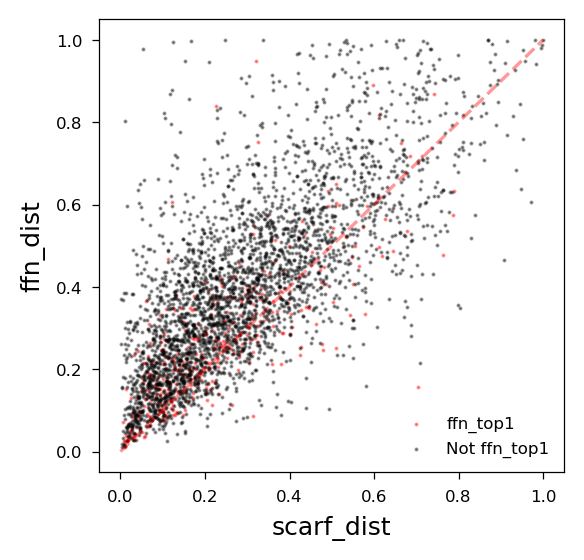

In [137]:
parity_x = np.linspace(0,1, 100)
fig = plt.figure(figsize=(3,3), dpi=200)
ax = fig.gca()
ax.scatter(x[colorval],y[colorval], alpha=0.4, c="Red", s=0.4, label=f"{colorname}")
ax.scatter(x[~colorval],y[~colorval], alpha=0.4, c="Black", s=0.4, label=f"Not {colorname}")
ax.plot(parity_x, parity_x, color="red", linestyle="--", alpha=0.4)
ax.legend(**legend_params)
ax.set_xlabel(xname)
ax.set_ylabel(yname)





In [157]:
res_folder = Path("../results/ffn_baseline_epoch_ablation_canopus_train_public/")
names = [i.parent.parent.stem for i in all_reranks]
all_reranks = list(res_folder.rglob("rerank_eval_cos.yaml"))

In [158]:
yaml_files = {i: yaml.safe_load(open(j, "r")) for i, j in zip(names, all_reranks)}

In [159]:
out_df = []
keys_to_name = {f"avg_top_{i}": i for i in range(1,11)}
keys_to_name['avg_true_dist'] = "Cosine Dist."
for k, v in yaml_files.items():
    for old_name, new_name in keys_to_name.items():
        new_entry = {
            "Method": k, 
            "Top k": new_name,
            "Acc": v[old_name]
        }
        out_df.append(new_entry)
out_df = pd.DataFrame(out_df)

In [161]:
pivoted_tbl = out_df.reset_index().pivot_table(index="Method", values="Acc", columns="Top k")
pivoted_tbl.index.name = None
pivoted_tbl = pivoted_tbl.round(3)
pivoted_tbl.sort_index()

Top k,1,2,3,4,5,6,7,8,9,10,Cosine Dist.
max_epoch_1,0.043,0.074,0.098,0.119,0.145,0.168,0.201,0.220,0.246,0.271,0.879
max_epoch_10,0.136,0.238,0.287,0.341,0.389,0.426,0.458,0.495,0.522,0.549,0.577
max_epoch_40,0.193,0.310,0.393,0.455,0.492,0.531,0.558,0.581,0.606,0.623,0.509
max_epoch_5,0.091,0.179,0.228,0.269,0.304,0.343,0.382,0.398,0.421,0.460,0.675
